<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/main/KU_0527ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Lambda,Input, Reshape

#정규분포의 layer가 없어서 대신, lambda를 넣어서 변환시켜줌

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.datasets import mnist

(X_train, _),(X_test, _) = mnist.load_data()


In [40]:
import tensorflow.keras.backend as K

In [42]:
K.random_normal??

#정규분포의 parameter 

파라미터는 보통 그리스 문자에 의해서 샘플 통계량과 구분된다. 예를 들어, 모집단의 평균은 그리스 문자 뮤(μ)로 표시되고, 모집단의 표준 편차는 그리스 문자 시그마(σ)로 표시된다. 파라미터들은 고정된 값으로, 즉, 그들은 변수와 같이 변화하지 않는다. 하지만, 그들의 값들은 보통 알려지지 않는다. 왜냐하면 전체 모집단을 측정하는 것은 보통 불가능하기 때문

[refer] https://angeloyeo.github.io/2020/09/14/normal_distribution_derivation.html
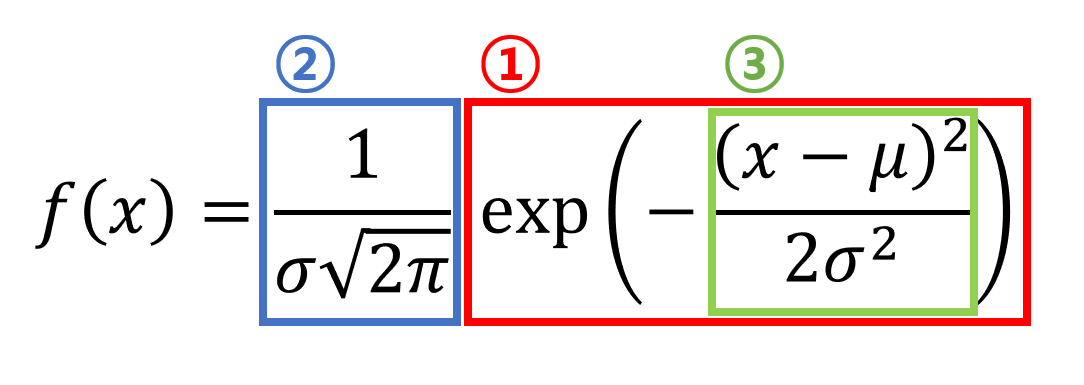

#함수 만들기 

In [46]:
#수정 필요
def sampling(*args):
  latent_dim = 2
  #* args
  z_mean, z_logvar= args
  #args에서 받아서 random_noraml을 만듬 <- shape필요
  #epsilon = K.random_normal(shape = (K.shape(z_mean)[0]), latent_dim)
  epsilon = K.random_normal(shape = (K.shape(z_mean)[0],),z_mean=0,stddev=1)
  #shape <- z_mean을 넣는다, Z_mean의 첫번째값
  """mean = 0 
  stddev = epsilon.std()
  #epsilon에서 std값을 가져와서 넣기"""
  return z_mean + K.exp(z_logvar/2) * epsilon
  #exp쓴 이유? 정규분포의 식 exponential-제곱에서 부터 나옴
  #z_logvar = 분산(sigma제곱)


In [ ]:
def sampling(*args):
  latent_dim = 2
  #* args
  z_mean, z_logvar= args
  #args에서 받아서 random_noraml을 만듬 <- shape필요
  #epsilon = K.random_normal(shape = (K.shape(z_mean)[0]), latent_dim)
  epsilon = K.random_normal(shape = (K.shape(z_mean)[0],),z_mean=0,stddev=1)
  #shape <- z_mean을 넣는다, Z_mean의 첫번째값
  """mean = 0 
  stddev = epsilon.std()
  #epsilon에서 std값을 가져와서 넣기"""
  return z_mean + K.exp(z_logvar/2) * epsilon
  #exp쓴 이유? 정규분포의 식 exponential-제곱에서 부터 나옴
  #z_logvar = 분산(sigma제곱)

In [43]:
"""def kl_loss(*args):
  z_mean, z_logvar = args
  kl_loss_val = K.sum(
      1+z_logvar + K.exp(z_logvar) - K.square(z_mean), axis =1)
  return kl_loss_val """

In [57]:
def kl_loss(*args):
  z_mean, z_logvar = args
  kl_loss_val = -0.5* K.sum(1+z_logvar - K.exp(z_logvar) - K.square(z_mean), axis =-1)
  return kl_loss_val 

In [59]:
kl_loss = 0.5*K.sum(1+z_logvar - K.exp(z_logvar) - K.square(z_mean), axis =-1)

In [47]:
def mse(y_pred, y):
  return K.mean(K.square(y_pred-y))

In [44]:
Lambda??

In [54]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [55]:
latent_dim = 2 
#잠재공간 설정

input_ = Input(shape=X_train.shape[1:])
x = Flatten()(input_)
x = Dense(128, activation ='relu')(x) #보통은 sigmoid많이 씀
x = BatchNormalization()(x)

#z_mean = Dense(latent_dim, )
#두 공간이 들어와야 함 (잠재공간, activation = linear라 생략 )
z_mean = Dense(latent_dim)(x)
z_logvar = Dense(latent_dim)(x) 

#z_mean과 z_logvar를 묶어주는게 필요함 
z = Lambda(sampling, output_shape =(latent_dim,))([z_mean, z_logvar])
#sampling 함수를 통해 계산되게 적용


#encoder, decoder 설정 ########################################
encoder = Model(input, z)
#encoded = encoder.shape #인코더된 값
#decoder = Dense(128)(encoder) #encoder받아서 128로 내보낸다. 
input_encoder = Input(shape=(2,))


decoder = Dense(128, activation = 'relu', input_shape=(2,))
decoder = Dense(np.prod(X_train.shsape[1:]), activation='sigmoid')(decoder)
decoder = Dense(np.prod(X_train.shape[:1]))(decoder)
decoder = Model(input_decoder, decoder)
#decoder = Model(encoded, decoder)

#sequential로 하기보다 함수형으로 sub class만드는게 필수적



ValueError: ignored

In [50]:
vae = Sequential([encoder, decoder])
vae.build(shape=(28,28,1))

NameError: ignored

In [ ]:
vae = Sequential([encoder, decoder])
vae.build(shape=(28,28,1))

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [56]:
encoder.summary()

NameError: ignored

In [49]:
vae.compile(optimizer= 'rmsprop', loss = kl_loss, metrics = ['mse'])

NameError: ignored

In [ ]:
vae.fit(X_train, y_train, epoches = 10, batch_size=128, validation_data(X_test, y_test))

In [34]:
model = Model(input_, z_mean)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Model(input_, x)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Model(input_,z)

In [ ]:
model.summary()

In [26]:
model = Sequential(
    [
        Dense(10, input_shape=(3,)),
        Dense(1)
    ]
)

In [25]:
model.compile(optimizer = 'rmsprop', loss=mse, metrics = ['mse'])

In [ ]:
x = np.random.randn(100,3)
y = np.random.randn(100,1)
model.fit(x, y, epochs=3)

In [11]:
model = Model(input_,)

In [16]:
model.summary()

ValueError: ignored

# up-sampling

In [ ]:
from tensosrflow.keras.layers import 

In [ ]:
#저해상도 -> 고해상도로 만들 떄 쓸 수 있음. 

X_train = X_train.reshape(-1.28,28,1)
input_ = Input(shape = X_train.shape[1:])
x = Conv2D(32,3,1, padding='same')(input_)
x = MaxPooling2D(2)(x)
x = UpSampling()(x)
x = Conv2D(1,3,1, padding='same')(x) #-> padding을 x로 받음
x = UpSampling2D(3)(x) #3배로 커짐 
model = Model(input_, x)
model.summary()

In [ ]:
latent_dim = 10
#잠재공간 설정

input_encoder = Input(shape=X_train.shape[1:])

encoder = Conv2D(32,3,1, activation = 'tanh')(input_encoder)
encoder = MaxPooling2D(2)(input_encoder)
encoder = Conv2D(64,3, 1, activation = 'tanh')(encoder)
encoder = MaxPooling2D(2)(encoder)
x = Flatten()(input_)
x = Dense(128, activation ='relu')(x) #보통은 sigmoid많이 씀
x = BatchNormalization()(x)

#z_mean = Dense(latent_dim, )
#두 공간이 들어와야 함 (잠재공간, activation = linear라 생략 )
z_mean = Dense(latent_dim)(x)
z_logvar = Dense(latent_dim)(x) 

#z_mean과 z_logvar를 묶어주는게 필요함 
z = Lambda(sampling, output_shape =(latent_dim,))([z_mean, z_logvar])
#sampling 함수를 통해 계산되게 적용


#encoder, decoder 설정 ########################################
encoder = Model(input, z)
#encoded = encoder.shape #인코더된 값
#decoder = Dense(128)(encoder) #encoder받아서 128로 내보낸다. 
input_encoder = Input(shape=(2,))


decoder = Dense(128, activation = 'relu', input_shape=(2,))
decoder = Dense(np.prod(X_train.shsape[1:]), activation='sigmoid')(decoder)
decoder = Dense(np.prod(X_train.shape[:1]))(decoder)
decoder = Model(input_decoder, decoder)
#decoder = Model(encoded, decoder)

In [ ]:
#함수 느릴 때, 실행하면 실행 시간 볼 수 있음. 
import io, cProfile, pstats

def warpper(func):
  pr.cProfile.profile()
  pr.enable()
  retval = func(args)
  pr.disable
  s = io.StringIO()
  ps = pstatss.Stats(pr.stream =s).print_stats('cumulative')
  ps.print_stats(x)
  print(s.getvalue())
  return retrval
return wrapper


In [ ]:
@profile
def xxx():
  return 2



In [ ]:
xxx()